# Introduction Lecture

## Separation of Concerns

### Initial version

We first start by implementing a factorial using a simple recursive call

In [1]:
def factorial(n: int) -> int:
    if n < 0:
        raise ValueError("Arg must be >= 0")
    if n <= 1:
        return 1
    else:
        return n * factorial(n - 1)

In [2]:
factorial(5)

120

In [3]:
try: 
    factorial(-1)
except ValueError as error:
    print(f'ValueError: {error}')

ValueError: Arg must be >= 0


This function does two things:
  - Business logic: Compute the factorial in a recursive way
  - Technical: Check the function domain (n > 0)


### Extracting Technical concern

In [4]:
def checker(n: int) -> bool:
    if n < 0:
        raise ValueError("Arg must be >= 0")

In [5]:
def factorial(n: int) -> int:
    checker(n)
    if n <= 1:
        return 1
    else:
        return n * factorial(n - 1)

In [6]:
try: 
    factorial(-1)
except ValueError as error:
    print(f'ValueError: {error}')

ValueError: Arg must be >= 0


### Decorating the business logic

In [10]:
from functools import wraps

def ensure_domain(function):
    @wraps(function)
    def checker(arg):
        if arg < 0:
            raise ValueError("Arg must be >= 0")
        return function(arg)
    return checker

In [11]:
@ensure_domain
def factorial(n: int) -> int:
    if n <= 1:
        return 1
    else:
        return n * factorial(n - 1)

In [12]:
try: 
    factorial(-1)
except ValueError as error:
    print(f'ValueError: {error}')

ValueError: Arg must be >= 0


## Drawing benchmarks

In [15]:
from pyperf import BenchmarkSuite
from os.path import exists

In [17]:
bench_datafile = 'outputs/pyperf_measurement.json'
if not exists(bench_datafile):
    raise UserWarning('You must execute the benchmark before exploring the results!')

### Extracting observations from the benchmark

API documentation: https://pyperf.readthedocs.io/en/latest/api.html

In [19]:
results = BenchmarkSuite.load(bench_datafile)

In [25]:
algorithms = set(map(lambda c: c.split('-')[0], results.get_benchmark_names()))

In [28]:
points = set(map(lambda c: int(c.split('-')[1]), results.get_benchmark_names()))

In [30]:
(algorithms, points)

({'fac_acc',
  'fac_acc_oneline',
  'fac_for',
  'fac_oneline',
  'fac_rec',
  'fac_rec_oneline',
  'fac_tailrec',
  'fac_tailrec_oneline',
  'fac_while',
  'factorial'},
 {0, 10, 50, 100, 200, 300})

In [32]:
results.get_benchmark('factorial-50').mean()

4.124453629175822e-07

### Plot time against argument value

In [33]:
from matplotlib import pyplot as plt

In [104]:
def plot_time_against_value(results, algorithms, points, canvas):
    x_series = sorted(points)
    for algo in algorithms:
        y_series = list(map(lambda n: results.get_benchmark(f'{algo}-{n}').mean() * 1000, points))
        canvas.plot(x_series, y_series, label = algo, linestyle='--', marker='o')
    canvas.set_yscale('log')
    canvas.set_title(f'Execution time')
    canvas.set(xlabel='N', ylabel='avg exec. time (ms)')
    canvas.legend()

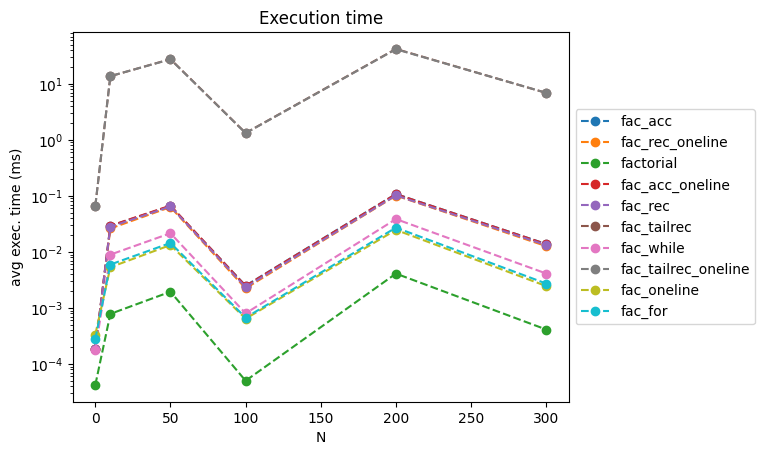

In [107]:
fig, axe = plt.subplots()
plot_time_against_value(results, algorithms, points, axe)
axe.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Plot distribution

In [108]:
def plot_time_distribution(results, algorithms, n, canvas):
    sorted(algorithms)
    values = list(map(lambda algo: results.get_benchmark(f'{algo}-{n}').get_values(), algorithms))
    canvas.boxplot(values, notch=True, labels=algorithms)
    canvas.set_yscale('log')
    canvas.set_title(f'Time Distribution')
    canvas.set(xlabel='algorithm', ylabel='avg time')

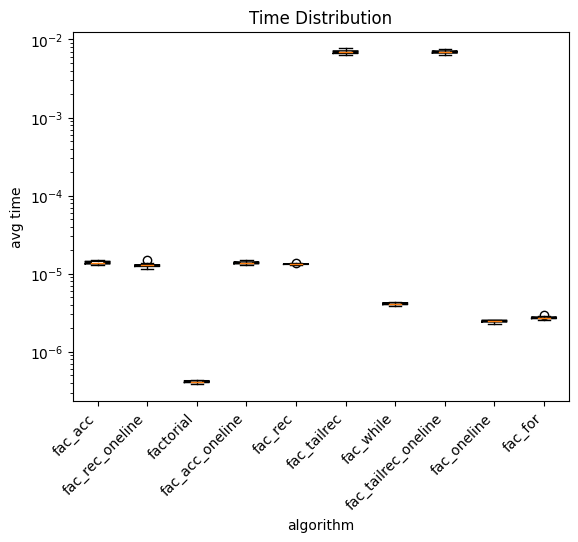

In [109]:
fig, axe = plt.subplots()
plt.setp(axe.get_xticklabels(), rotation=45, ha='right')
plot_time_distribution(results, algorithms, 50, axe)